# Data Ingestion of all files:

The code in the follow cell is dedicated to ingesting the data from the different file types found in
data folder. Once the data is ingested for each data type, a Pandas dataframe will be created for 
each file type for ease of use when reorgnazing into a unified format and using for data insight.

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
import xml.etree.ElementTree as ET
import os
import plotly.express as px

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Function to read JSON file
def read_json(file_path):
    try:
        data = pd.read_json(file_path)
        # Assuming 'people' is the column name
        df = pd.DataFrame(data['people'].tolist())
        return df
    except Exception as e:
        print(f"Error reading JSON file: {e}")
        return None

# Function to read YAML file
def read_yaml(file_path):
    try:
        with open(file_path, 'r') as yaml_file:
            data = yaml.safe_load(yaml_file)
            # Assuming 'people' is the top-level key
            df = pd.DataFrame(data['people'])
            return df
    except Exception as e:
        print(f"Error reading YAML file: {e}")
        return None

# Function to read CSV file
def read_csv(file_path):
    try:
        data = pd.read_csv(file_path)
        data.replace("''", np.nan, inplace=True)
        return data
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None

# Function to read XML file
def read_xml(file_path):
    try:
        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Initialize lists to store extracted data
        transaction_ids = []
        name = []
        items = []
        prices = []
        stores = []
        transaction_dates = []

        # Loop through each 'transaction id' tag
        for transaction_id in root.findall('.//transaction'):
            # Extract data from nested tags
            transaction_ids.append(transaction_id.attrib.get('id'))
            name.append(transaction_id.find('buyer_name').text)
            items.append(transaction_id.find('item').text)
            prices.append(transaction_id.find('price').text)
            stores.append(transaction_id.find('store').text)
            transaction_dates.append(transaction_id.find('transactionDate').text)

        # Create DataFrame from extracted data
        df = pd.DataFrame({
            'transaction_id': transaction_ids,
            'name': name,
            'item': items,
            'price': prices,
            'store': stores,
            'transaction_date': transaction_dates
        })

        return df
    except Exception as e:
        print(f"Error reading XML file: {e}")
        return None

# Create a directory if it doesn't exist
directory = 'Data_storage'
if not os.path.exists(directory):
    os.makedirs(directory)

# Set Pandas display options to show all columns without truncation
pd.set_option('display.max_columns', None)


# Data Matching and Conforming - XML file: 

The following code is used to load the data from the file and format it 
accordingly to all other dataframes. Also, the entries in the data types
in this dataframe have been formated to their appropriate data types for 
data insight. Finally, the reorganized and reformatted data will be stored
as a .csv file in the Data_storage folder.

In [12]:

# Read data from XML file
transactions_xml = read_xml("data/transactions.xml")

# Sort the DataFrame by the 'name' column in alphabetical order
transactions_xml = transactions_xml.sort_values(by='name', ignore_index=True)

# Capitalize column names
transactions_xml.columns = transactions_xml.columns.str.capitalize()

# Define the file path
file_path = os.path.join(directory, 'transactions_data.csv')

# Save the DataFrame as a CSV file
transactions_xml.to_csv(file_path, index=False)

print(f"DataFrame has been successfully saved as a CSV file in {directory}\n")

# Display the transactions_xml DataFrame
print("Transactions XML DataFrame:")
transactions_xml

DataFrame has been successfully saved as a CSV file in Data_storage

Transactions XML DataFrame:


,Transaction_id,Name,Item,Price,Store,Transaction_date
0,1007,A. Bailey,grape,0.75,Whimsical Willow Wares,2021-08-11
1,1019,A. Chapman,mango,3,Glimmering Gems Boutique,2023-01-14
2,1020,A. Chapman,apple,2.5,Frolicking Fox Furnishings,2023-03-03
3,1039,A. Parr,grape,1.5,Pegasus Pet Paradise,2023-06-04
4,1017,A. Sanderson,mango,4,Pegasus Pet Paradise,2022-05-16
5,1038,A. Walker,strawberry,4.5,Whimsical Willow Wares,2023-05-12
6,1016,B. Arnold,orange,2,Frolicking Fox Furnishings,2022-04-30
7,1035,B. Reid,watermelon,4,Glimmering Gems Boutique,2022-09-12
8,1033,B. Sutherland,mango,4.5,Whimsical Willow Wares,2022-01-27
9,1024,B. Sutherland,grape,1.5,Pegasus Pet Paradise,2023-06-20


# Data Analysis - XML file: 

The following code is used to derive insight from the now reformated and
reorganize data file. For this particular data file, the code below will 
provide insight on the best-selling store item and the store that made 
the most profit. As part of the data insight we shall provide plots on the and suggestions based on the results.

In [13]:

# Convert 'Transaction_date' to datetime
transactions_xml['Transaction_date'] = pd.to_datetime(transactions_xml['Transaction_date'])

# 1. Clients and Promotions
#clients_promotions = transactions_xml.groupby(['Name', 'Item']).size().reset_index(name='Count')

# 2. Client Responses
# Extract clients who responded "No" to promotions
#no_responses = transactions_xml[transactions_xml['Name'].isin(promotions_csv[promotions_csv['responded'] == 'No']['client_email'].unique())]

# 3. Store Insights
# Best selling item
best_selling_item = transactions_xml.groupby('Item')['Transaction_id'].count().idxmax()

# 4. Store Insights
# Calculate profit for each transaction
transactions_xml['Total_Price'] = transactions_xml['Price']
transactions_xml['Profit'] = transactions_xml['Price']
transactions_xml['Profit'] = pd.to_numeric(transactions_xml['Profit'], errors='coerce')

# Aggregate profit by store
store_profit = transactions_xml.groupby('Store')['Profit'].sum().idxmax()

# Output insights
#print("Clients and Promotions:")
#print(clients_promotions)
#print("\nClients who responded 'No' to promotions:")
#print(no_responses)
print('Store Insights:')
print("Best-selling item - ", best_selling_item)
print("Store with the most profit - ", store_profit)

Store Insights:
Best-selling item -  apple
Store with the most profit -  Pegasus Pet Paradise


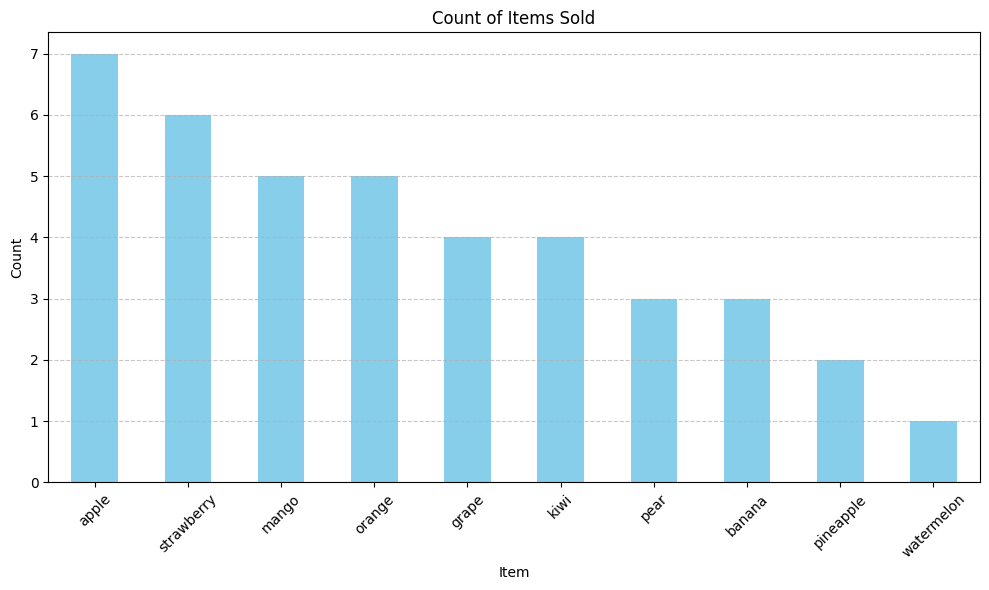

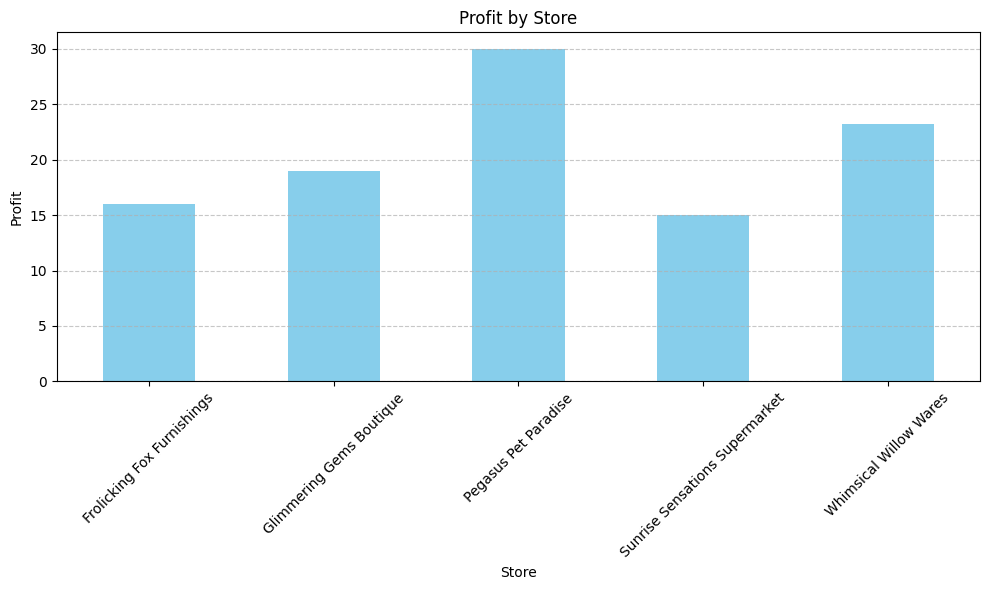

In [14]:
# Group by item and count the number of occurrences
item_counts = transactions_xml['Item'].value_counts()

plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Items Sold')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate profit for each store
store_profit = transactions_xml.groupby('Store')['Profit'].sum()

plt.figure(figsize=(10, 6))
store_profit.plot(kind='bar', color='skyblue')
plt.title('Profit by Store')
plt.xlabel('Store')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Suggestions - XML file:
Based on the data results above, since Sunrise Sensations Supermarket seems to be the least
profitable store during this period of time, I would suggest that they begin promoting more
apples items more in order to increase profits.

# Data Matching and Conforming - yaml and json file: 

The following code is used to load the dataframes from the yaml and json files that was ingested 
earlier. Also, the following code will be performing several transformations to the original 
json dataframe. The goal of these transformations is to commonize its formatting as much
possible to the format of the yaml dataframe in order to identify common entries or 
inconsistencies in the data and eventually consolidate both dataframes into one. Finally,
the consolidated dataframe will be stored as a .csv file in the Data_storage folder.

In [15]:
''' Transformation 1 - Convert the devices column into three seperate columns for each type of device'''

# Read data from different file types
people_json = read_json("data/people.json")
people_yaml = read_yaml("data/people.yml")

# Function to check if a device is present in the 'devices' list
def check_device(device_list, device):
    return device in device_list

# Create new DataFrame with columns for each device type
new_columns = ['iPhone', 'Android', 'Desktop']
new_data = []

# Populate the new DataFrame
for index, row in people_json.iterrows():
    device_list = row['devices']
    new_row = {
        'iPhone': check_device(device_list, 'iPhone'),
        'Android': check_device(device_list, 'Android'),
        'Desktop': check_device(device_list, 'Desktop')
    }
    new_data.append(new_row)

# Convert the list of dictionaries into a DataFrame
new_df = pd.DataFrame(new_data, columns=new_columns)

# Drop the 'devices' column from the original DataFrame
people_json.drop(columns=['devices'], inplace=True)

# Concatenate the original DataFrame and the new DataFrame
people_json = pd.concat([people_json, new_df], axis=1)

# Display the updated DataFrame
#print("yaml DataFrame:")
#print("Updated json DataFrame:")
#people_json


In [16]:
'''Transformation 2 - Concatenate the firstName and surname column in the json dataframe
                      into a single column called name like in the yaml dataframe'''

# Create a new column 'name' by concatenating 'firstName' and 'surname' and insert it as the second column
people_json.insert(1, 'name', people_json.apply(lambda row: f"{row['firstName']} {row['surname']}", axis=1))

# Drop the 'firstName' and 'surname' columns from the original DataFrame
people_json.drop(columns=['firstName', 'surname'], inplace=True)

# Display the updated DataFrame
#print("Updated json DataFrame:")
#people_json

In [17]:
'''Transformation 3 - Formating the location, id and telephone columns in the json dataframe
                      to look like the columns from the yaml dataframe'''

# Apply lambda function to format 'location' column and create 'city' column
people_json.insert(3, 'city', people_json['location'].apply(lambda x: f"{x['city']}, {x['country']}"))

# Drop the 'location' column from the DataFrame
people_json.drop(columns=['location'], inplace=True)

# Remove leading zeros from 'id' column
people_json['id'] = people_json['id'].astype(str).str.lstrip('0')

# Rename the 'telephone' column to 'phone'
people_json.rename(columns={'telephone': 'phone'}, inplace=True)

# Display the updated DataFrame
#print("Updated DataFrame:")
#people_json

In [18]:
# Concatenate the yaml and json DataFrames along the row axis
people_df = pd.concat([people_yaml, people_json])

# Format 'name' column in concatenated_df to match the format of transactions_xml
people_df['name'] = people_df['name'].apply(lambda x: f"{x.split()[0][0]}. {' '.join(x.split()[1:])}")

# Sort the DataFrame by the 'name' column in alphabetical order
people_df = people_df.sort_values(by='name', ignore_index=True)

# Display the people_df w/duplicates 
#print("People DataFrame w/duplicates:")
#people_df

In [19]:
# Drop duplicate rows and rest the index
people_wo_duplicates_df = people_df.drop_duplicates(subset=['name', 'email']).reset_index(drop=True)

# Convert the 'id' column in the people_wo_duplicates_df dataFrame to integers
people_wo_duplicates_df['id'] = people_wo_duplicates_df['id'].astype(int)

# Capitalize column names
people_wo_duplicates_df.columns = people_wo_duplicates_df.columns.str.capitalize()

# Name the csv file
file_name = 'people_data.csv'

# Define the file path
file_path = os.path.join(directory, file_name)

# Save the DataFrame as a CSV file
people_wo_duplicates_df.to_csv(file_path, index=False)

print(f"DataFrame has been successfully saved as {file_name} in {directory} folder\n")

# Display the concatenated DataFrame
print("Consolidated People dataframe:")
people_wo_duplicates_df

DataFrame has been successfully saved as people_data.csv in Data_storage folder

Consolidated People dataframe:


,Id,Name,Email,City,Phone,Iphone,Android,Desktop
0,14,A. Allan,abigail.allan@example.com,"Yangon, Myanmar",555-8008,True,True,False
1,3,A. Bailey,amelia.bailey@example.com,"Guadalajara, Mexico",555-3448,True,False,True
2,100,A. Carr,alan.carr@example.com,"Paris, France",555-7569,True,True,True
3,96,A. Chapman,alan.chapman@example.com,"Shanghai, China",555-9610,False,True,True
4,41,A. Clark,abigail.clark@example.com,"Santiago, Chile",555-4948,False,False,True
5,42,A. Duncan,anne.duncan@example.com,"Tokyo, Japan",555-9797,True,True,True
6,59,A. Gray,amelia.gray@example.com,"Hong Kong, China",555-3781,False,False,True
7,85,A. Hunter,anthony.hunter@example.com,"Kolkata, India",555-5332,True,True,True
8,10,A. James,alexander.james@example.com,"Cairo, Egypt",555-6536,True,True,True
9,45,A. MacLeod,abigail.macleod@example.com,"Shenyang, China",555-5065,True,False,False


# Data Matching and Conforming - promotions.csv file:
The following code is used to load the dataframe from the promotions.csv file that was ingested 
earlier. The original Promotions dataframe contains several rows of missing data (NaN) in the 
client_email and telephone column. The code below will be using the previously created
Consolidated People dataframe to fill in the missing data in the Promotions dataframe.
Also, the Promotions dataframe will go through several formatting transformations in order to
commonize it as much as possible to the format of the Consolidated People dataframe.
This is ease of use during the data analysis,which will include both dataframes. Finally,
the Promotions dataframe will be stored as a .csv file in the Data_storage folder.

In [20]:
# Read data from file type
promotions_csv = read_csv("data/promotions.csv")

# Display of the promotions DataFrame
print("Original Promotions DataFrame w/missing data:\n")
promotions_csv


Original Promotions DataFrame w/missing data:



,client_email,telephone,promotion,responded
0,stephen.brown@example.com,NaN,pear,No
1,dorothy.peake@example.com,555-8309,kiwi,No
2,NaN,555-7998,mango,No
3,katherine.butler@example.com,555-2311,banana,Yes
4,adam.wilson@example.com,555-3416,orange,Yes
5,NaN,555-8131,apple,No
6,julia.coleman@example.com,555-4073,kiwi,Yes
7,amelia.gray@example.com,555-3781,pear,Yes
8,elizabeth.ross@example.com,555-5323,watermelon,Yes
9,NaN,555-3555,pineapple,No


In [21]:
''' Transformation - Mising information for client_email and telephone will be retrieved from the Consolidated
            People DataFrame. When client_email was missing, the telephone data of that same row
            was used to look up the email in the Consolidated People DataFrame and when the telephone
            data was missing, the client_email was used to look up the phone number in the Consolidated 
            People DataFrame.
'''

# Fill missing 'client_email' based on 'telephone'
promotions_csv['client_email'] = promotions_csv.apply(
    lambda row: people_wo_duplicates_df.loc[
        people_wo_duplicates_df['Phone'] == row['telephone'], 'Email'].values[0]
    if pd.isnull(row['client_email']) and not pd.isnull(row['telephone'])
    else row['client_email'],
    axis=1
)

# Fill missing 'telephone' based on 'client_email'
promotions_csv['telephone'] = promotions_csv.apply(
    lambda row: people_wo_duplicates_df.loc[
        people_wo_duplicates_df['Email'] == row['client_email'], 'Phone'].values[0]
    if pd.isnull(row['telephone']) and not pd.isnull(row['client_email'])
    else row['telephone'],
    axis=1
)

# Add corresponding 'id', 'name', and 'city' columns based on 'client_email'
promotions_csv['id'] = promotions_csv['client_email'].map(people_wo_duplicates_df.set_index('Email')['Id'])
promotions_csv['name'] = promotions_csv['client_email'].map(people_wo_duplicates_df.set_index('Email')['Name'])
promotions_csv['city'] = promotions_csv['client_email'].map(people_wo_duplicates_df.set_index('Email')['City'])

# Reorder and rename the columns to be in a similar format to the people dataframe
promotions_csv = promotions_csv[['id', 'name', 'client_email', 'telephone', 'promotion', 'responded','city']]
new_column_names = {'client_email': 'email', 'telephone': 'phone'}
promotions_csv = promotions_csv.rename(columns=new_column_names)

In [22]:
# Capitalize column names
promotions_csv.columns = promotions_csv.columns.str.capitalize()

# Sort the columns
promotions_csv = promotions_csv.sort_values(by=['Name', 'Id'], ignore_index=True)

# Name the csv file
file_name = 'promotions.csv'

# Define the file path
file_path = os.path.join(directory, file_name)

# Save the DataFrame as a CSV file
people_wo_duplicates_df.to_csv(file_path, index=False)

print(f"DataFrame has been successfully saved as {file_name} in {directory} folder\n")

# Print the updated dataframe
print("Updated Promotions DataFrame w/added data:\n")
promotions_csv

DataFrame has been successfully saved as promotions.csv in Data_storage folder

Updated Promotions DataFrame w/added data:



,Id,Name,Email,Phone,Promotion,Responded,City
0,14,A. Allan,abigail.allan@example.com,555-8008,pear,Yes,"Yangon, Myanmar"
1,3,A. Bailey,amelia.bailey@example.com,555-3448,kiwi,Yes,"Guadalajara, Mexico"
2,42,A. Duncan,anne.duncan@example.com,555-9797,kiwi,No,"Tokyo, Japan"
3,59,A. Gray,amelia.gray@example.com,555-3781,pear,Yes,"Hong Kong, China"
4,45,A. MacLeod,abigail.macleod@example.com,555-5065,banana,No,"Shenyang, China"
5,11,A. Parr,audrey.parr@example.com,555-6516,strawberry,No,"Istanbul, Turkey"
6,66,A. Wilson,adam.wilson@example.com,555-3416,orange,Yes,"Nagoya, Japan"
7,49,B. Davies,boris.davies@example.com,555-6642,mango,Yes,"Saint Petersburg, Russia"
8,39,B. Reid,bella.reid@example.com,555-5653,kiwi,Yes,"Delhi, India"
9,62,D. Peake,dorothy.peake@example.com,555-8309,kiwi,No,"Lahore, Pakistan"


# Data Analysis - people.yaml, people.json and promotions.csv files: 

The following code is used to derive insight from the now reformated and
reorganize Consolidated People and the Promotions dataframes. For this particular data analysis
the code below will determine response rate for each promotion and deterimine in which cities 
each particular promotions was most popular. I will then provide a plot of the response
rate for each promotion and a visual of the how responses rate varies across different locations.

In [23]:
# Merge the dataframes on 'Email' column since it seems to be the common identifier
merged_df = pd.merge(people_wo_duplicates_df, promotions_csv, on='Email', how='inner')

merged_df.drop(['City_y', 'Name_y', 'Id_y', 'Phone_y'], axis=1, inplace=True)
merged_df.rename(columns={'City_x': 'City', 'Name_x': 'Name', 'Id_x': 'Id', 'Phone_x': 'Phone'}, inplace=True)

# Calculate response rate for each promotion
response_rate = merged_df.groupby('Promotion')['Responded'].apply(lambda x: round((x == 'Yes').mean() * 100, 3)).reset_index(name='Response Percentage')

# Analyze promotions by location
promotions_by_city = merged_df.groupby(['City', 'Promotion']).size().reset_index(name='Count')

# Output insights
print("Response Rate for Each Promotion:")
print(response_rate)
print("\nPromotions by Location:")
print(promotions_by_city)


Response Rate for Each Promotion:
    Promotion  Response Percentage
0       apple               33.333
1      banana               66.667
2       grape                0.000
3        kiwi               50.000
4       mango               80.000
5      orange               50.000
6        pear               75.000
7   pineapple                0.000
8  strawberry                0.000
9  watermelon               33.333

Promotions by Location:
                          City   Promotion  Count
0             Ahmedabad, India       apple      1
1             Ahmedabad, India      orange      1
2      Buenos Aires, Argentina       grape      1
3      Buenos Aires, Argentina        pear      1
4       Chicago, United States       apple      1
5             Chongqing, China        pear      1
6             Chongqing, China   pineapple      1
7                 Delhi, India       apple      1
8                 Delhi, India        kiwi      1
9              Dongguan, China       mango      1
10    

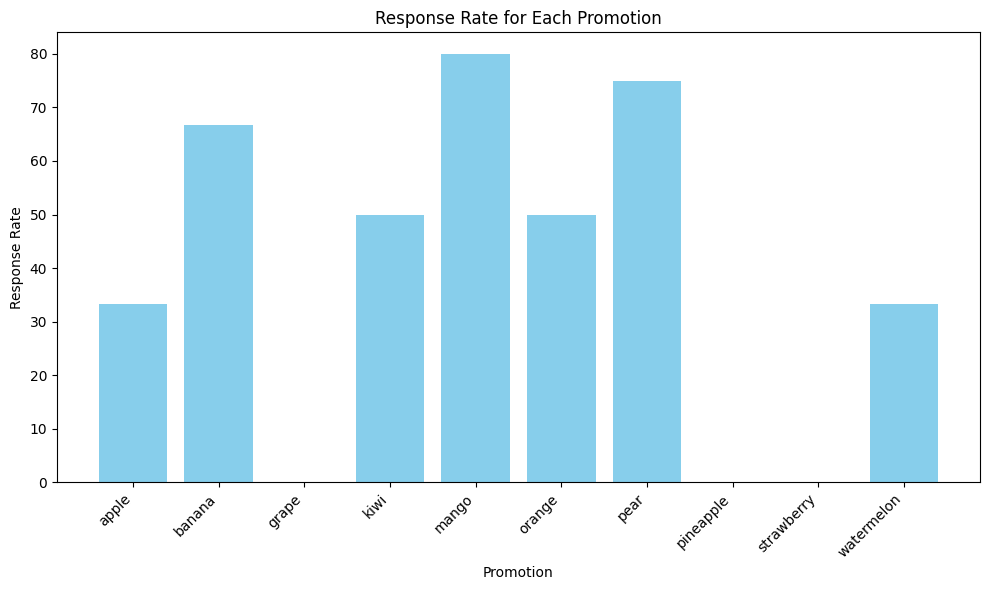

In [24]:
# Plots of Data insights

plt.figure(figsize=(10, 6))
plt.bar(response_rate['Promotion'], response_rate['Response Percentage'], color='skyblue')
plt.xlabel('Promotion')
plt.ylabel('Response Rate')
plt.title('Response Rate for Each Promotion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a grouped bar chart using Plotly
fig = px.bar(promotions_by_city, x='City', y='Count', color='Promotion', 
             title='Distribution of Promotions in Each City',
             labels={'City': 'City', 'Count': 'Number of Responses', 'Promotion': 'Promotion'},
             barmode='group')

# Update layout for better visualization
fig.update_layout(xaxis={'categoryorder':'total descending'}, 
                  xaxis_title='City', yaxis_title='Number of Responses', 
                  legend_title='Promotion', title_x=0.5)

# Show the plot
fig.show()


# Suggestions -  People and Promotions:
Based on the data analysis above taken from both the Consolidated People dataframe and
the Promotions dataframe, my suggestion would be to allocate more marketing in cities 
where the response rate was as high. Also, Venmito might want to consider tailoring 
their promotions based on the customers. For instance, provide promotions on 
alternative products to non-promotional products that are frequently purchased
by shoppers.

# Data Matching and Conforming - transfers.csv file:
The following code is used to load the dataframe from the transfers.csv file that was ingested 
earlier. First, the Original Transfer DataFrame shall be displayed as a Pandas dataframe. 
However, in order to make this data more useful, the code below will retrieve from the 
Consolidated People Dataframe the ids that match the sender_id and reciever_id and then
add the corresponding names of those senders and recievers in order to get more
insight into who are involved in transfers and by what amount.

In [25]:
''' 
The code below will display the Original Transfer DataFrame. However, I shall
be transforming it to make it more useful. I shall incorporate in it the name
of the Sender and the Recipient.
'''

# Read data from different file types
transfers_csv = read_csv("data/transfers.csv")

transfers_csv = transfers_csv.sort_values(by='sender_id').reset_index(drop=True)
transfers_csv

,sender_id,recipient_id,amount,date
0,21,30,55,2021-01-30
1,29,38,50,2022-03-10
2,30,21,80,2022-03-16
3,33,64,70,2022-03-21
4,37,13,35,2021-04-28
5,41,30,100,2021-03-14
6,42,44,95,2021-03-27
7,42,37,35,2022-11-18
8,43,4,55,2022-03-02
9,50,59,20,2023-05-22


In [26]:
''' Transformation - Retrieve from the Consolidated People Dataframe 
    the ids that match the sender_id and reciever_id and then add the
    corresponding names of those senders and recievers in order
    to get more informative insight into who are involved in transfers,
    how frequently are they doing transfers and by what quantities.
'''

# Merge with sender IDs
sender_df = pd.merge(transfers_csv, people_wo_duplicates_df[['Id','Name']], left_on='sender_id', right_on='Id', how='left').drop(['Id'],axis=1)

# Rename the 'name' column to 'Sender'
sender_df.rename(columns={'Name': 'Sender'}, inplace=True)

# Merge with recipient IDs
recipient_df = pd.merge(transfers_csv, people_wo_duplicates_df[['Id', 'Name']], left_on='recipient_id', right_on='Id', how='left').drop(['Id'],axis=1)

# Rename the 'name' column to 'Recipient'
recipient_df.rename(columns={'Name': 'Recipient'}, inplace=True)

# Combine the results
transfers_csv_merged = sender_df.merge(recipient_df[['Recipient']], left_index=True, right_index=True)

# Capitalize column names
transfers_csv_merged.columns = transfers_csv_merged.columns.str.capitalize()

# Reorder the column so each Sender_id and Recipient_id is next to their respective Sender and Recipient
transfers_csv_merged = transfers_csv_merged[['Sender_id', 'Sender', 'Recipient_id', 'Recipient','Amount', 'Date']]

# Change data type of entries in the 'Amount' column to float
transfers_csv_merged['Amount'] = transfers_csv_merged['Amount'].astype(float)

# Name the csv file
file_name = 'transfers.csv'

# Define the file path
file_path = os.path.join(directory, file_name)

# Save the DataFrame as a CSV file
people_wo_duplicates_df.to_csv(file_path, index=False)

print(f"DataFrame has been successfully saved as {file_name} in {directory} folder\n")

transfers_csv_merged

DataFrame has been successfully saved as transfers.csv in Data_storage folder



,Sender_id,Sender,Recipient_id,Recipient,Amount,Date
0,21,A. Morrison,30,S. Carr,55.0,2021-01-30
1,29,O. Ball,38,A. Walker,50.0,2022-03-10
2,30,S. Carr,21,A. Morrison,80.0,2022-03-16
3,33,F. Simpson,64,D. Blake,70.0,2022-03-21
4,37,G. Sharp,13,S. Duncan,35.0,2021-04-28
5,41,A. Clark,30,S. Carr,100.0,2021-03-14
6,42,A. Duncan,44,J. Bower,95.0,2021-03-27
7,42,A. Duncan,37,G. Sharp,35.0,2022-11-18
8,43,O. Morgan,4,J. Springer,55.0,2022-03-02
9,50,C. Watson,59,A. Gray,20.0,2023-05-22


# Data Analysis - transfers.csv file: 

The following code is used to derive insight from the now reformated and
reorganize Transfers dataframes. For this particular data analysis we will
focus on determining the top five senders based on amount transferred and
the frequency of transfers for both sender and receiver.

In [27]:
# Convert 'Date' column to datetime
transfers_csv_merged['Date'] = pd.to_datetime(transfers_csv_merged['Date'])

# Calculate total amount sent by each sender
total_amount_sent = transfers_csv_merged.groupby('Sender')['Amount'].sum().reset_index(name='Total Amount Sent')

# Calculate total amount received by each recipient
total_amount_received = transfers_csv_merged.groupby('Recipient')['Amount'].sum().reset_index(name='Total Amount Received')

# Sort the results to get the top 5 senders and recipients
top_senders = total_amount_sent.nlargest(5, 'Total Amount Sent')
top_recipients = total_amount_received.nlargest(5, 'Total Amount Received')

print("Top 5 Senders:")
print(top_senders)
print("\nTop 5 Recipients:")
print(top_recipients)

# Frequecy of transfers from senders and recipient
transaction_frequency_sent = transfers_csv_merged.groupby('Sender').size().reset_index(name='Number of Transactions Sent')
transaction_frequency_received = transfers_csv_merged.groupby('Recipient').size().reset_index(name='Number of Transactions Received')

# Sorting by the number of transactions sent and received in descending order
transaction_frequency_sent = transaction_frequency_sent.sort_values(by='Number of Transactions Sent', ascending=False)
transaction_frequency_received = transaction_frequency_received.sort_values(by='Number of Transactions Received', ascending=False)

print("\nTransaction Frequency by Sender:")
print(transaction_frequency_sent)
print("\nTransaction Frequency by Recipient:")
print(transaction_frequency_received)

Top 5 Senders:
          Sender  Total Amount Sent
28     P. Davies              205.0
2      A. Duncan              130.0
3      A. Hunter              130.0
24      M. Clark              125.0
5   A. Sanderson              120.0

Top 5 Recipients:
       Recipient  Total Amount Received
5    A. Morrison                  265.0
30       S. Carr                  235.0
1      A. Bailey                  105.0
13  C. Sanderson                  100.0
26   M. Springer                  100.0

Transaction Frequency by Sender:
          Sender  Number of Transactions Sent
28     P. Davies                            3
0     A. Chapman                            2
8       D. Blake                            2
29      P. Terry                            2
24      M. Clark                            2
23      J. Scott                            2
20      J. Blake                            2
19    J. Abraham                            2
18     G. Wright                            2
5   A. Sanderson

# Suggestions -  transfers.csv:
Based on the data analysis above taken from the Transfers dataframe, I would suggest
Venmito show appreciation to their top senders and receivers for using their services
to make transfers. Offer these top users special offers or rewards in the form of
either cash back or credit that can be used at partnered merchants.